Reading the Merged Data File

In [597]:
import pandas as pd

# Load the data from the uploaded CSV file to understand its structure and content
file_path = 'outliers.csv'
data = pd.read_csv(file_path)


'''

# Display the first few rows of the dataset and its summary information


data_info = data.info()
data_head = data.head()

data_info, data_head

'''

'\n\n# Display the first few rows of the dataset and its summary information\n\n\ndata_info = data.info()\ndata_head = data.head()\n\ndata_info, data_head\n\n'

1) Estimating a Regression from the data above with GWQ (based on pH) as the dependent variable and the economic indicator as the independent variable

In [598]:
import statsmodels.api as sm

# Selecting the columns needed for the regression analysis
data_filtered = data[['potentialofhydrogen', 'economic_indicator']].dropna()
# Setting up the dependent and independent variables
X = data_filtered['economic_indicator']  # Independent variable (SDP)
y = data_filtered['potentialofhydrogen']  # Dependent variable (GWQ)
X = sm.add_constant(X)  # Adding a constant for the intercept term

# Running the regression
model = sm.OLS(y, X).fit()


# Getting the summary of the regression results
regression_summary = model.summary()
regression_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     potentialofhydrogen   R-squared:                       0.005
Model:                             OLS   Adj. R-squared:                  0.005
Method:                  Least Squares   F-statistic:                     36.82
Date:                 Mon, 29 Apr 2024   Prob (F-statistic):           1.37e-09
Time:                         10:51:59   Log-Likelihood:                -3218.3
No. Observations:                 6959   AIC:                             6441.
Df Residuals:                     6957   BIC:                             6454.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  7.8221      0.007   1097.441      0.000       7.808       7.836
economic_indicator  8.894e-08   1.47e-08      6.068      0.000    6.02e-08    1.18e-07
==============================================================================
Omnibus:                     1052.887   Durbin-Watson:                   1.229
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5705.325
Skew:                          -0.616   Prob(JB):                         0.00
Kurtosis:                       7.262   Cond. No.                     7.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Degree of freedom of residuals is mentioned to be 6960 as the value of k for the equation being used is 1. Hence DF=n-k-1=6962-1-1=6960


PART 2

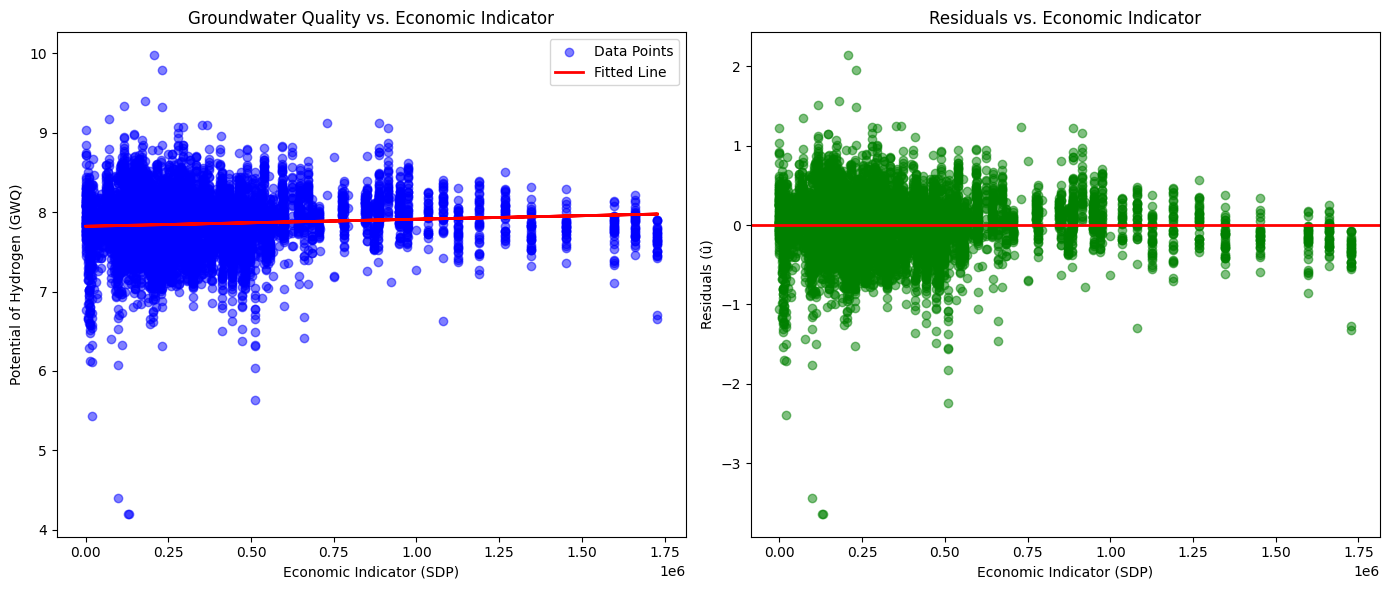

In [599]:
import matplotlib.pyplot as plt

# Calculate the residuals
data_filtered['residuals'] = model.resid

# Plot 1: Groundwater quality indicator vs. Economic Indicator with regression line
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(data_filtered['economic_indicator'], data_filtered['potentialofhydrogen'], color='blue', alpha=0.5, label='Data Points')
plt.plot(data_filtered['economic_indicator'], model.predict(), color='red', linewidth=2, label='Fitted Line')
plt.title('Groundwater Quality vs. Economic Indicator')
plt.xlabel('Economic Indicator (SDP)')
plt.ylabel('Potential of Hydrogen (GWQ)')
plt.legend()

# Plot 2: Residuals vs. Economic Indicator
plt.subplot(1, 2, 2)
plt.scatter(data_filtered['economic_indicator'], data_filtered['residuals'], color='green', alpha=0.5)
plt.axhline(0, color='red', linewidth=2)  # Adding a horizontal line at zero for reference
plt.title('Residuals vs. Economic Indicator')
plt.xlabel('Economic Indicator (SDP)')
plt.ylabel('Residuals (û)')

plt.tight_layout()
plt.show()



PART 3

Sum of residuals: 0.0000000000


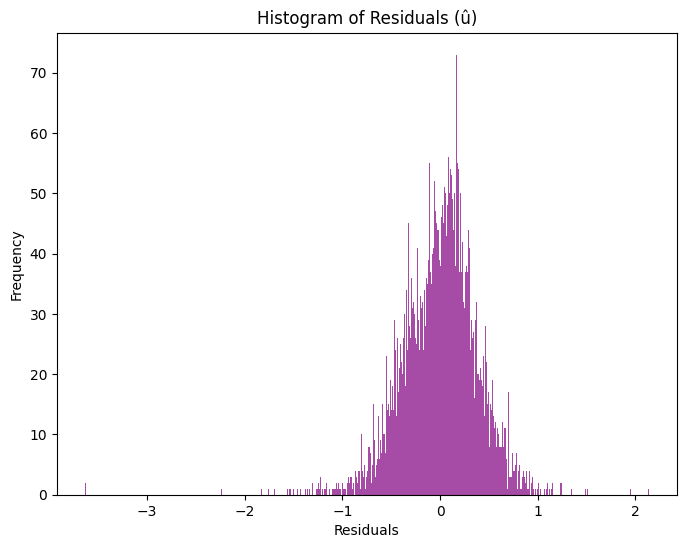

(5.9117155615240335e-12, None)

In [600]:
# Plotting the histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(data_filtered['residuals'], bins=1000, color='purple', alpha=0.7)
plt.title('Histogram of Residuals (û)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Verify that the sum of residuals is approximately zero
sum_of_residuals = data_filtered['residuals'].sum()
print(f"Sum of residuals: {sum_of_residuals:.10f}")
sum_of_residuals, plt.show()


In [ ]:
from statsmodels.stats.outliers_influence import OLSInfluence
import numpy as np

# Step 3: Identify Outliers and Influential Observations using DFFITS and DFBETAS
influence = OLSInfluence(model)

'''
dffits = influence.dffits[0]  # DFFITS for each observation

# Compute thresholds
n = len(data)
p = len(X.columns) - 1  # Exclude the intercept term
threshold_dffits = 2 * np.sqrt(p / n)

# Find outliers and influential observations
outliers_dffits = np.where(np.abs(dffits) > threshold_dffits)

print("Indices of outliers using DFFITS:", outliers_dffits)
print(len(outliers_dffits[0]))
'''

studentized_residuals = influence.resid_studentized_internal
outliers_studentized = np.where(np.abs(studentized_residuals) > 2)  # Threshold can be adjusted
print("Indices of outliers using Studentized Residuals:", outliers_studentized)


# Step 4: Tackling Outliers and Influential Observations
# Apply appropriate strategies to address outliers and influential observations.
l=outliers_studentized.tolist()
print(l)
'''
data_cleaned = data_filtered.drop(outliers_studentized)

X_cleaned = data_cleaned['economic_indicator']  # Independent variable (SDP)
Y_cleaned = data_cleaned['potentialofhydrogen']  # Dependent variable (GWQ)
X_cleaned = sm.add_constant(X_cleaned)  # Adding a constant for the intercept term

# Running the regression
cleaned_model = sm.OLS(Y_cleaned, X_cleaned).fit()


# Getting the summary of the regression results
cleaned_regression_summary = cleaned_model.summary()
cleaned_regression_summary
'''

PART 4

In [ ]:
# Enhancing the model to include a quadratic term for the economic indicator
new_data=data[['potentialofhydrogen', 'economic_indicator', 'gini']].dropna()
new_data['economic_indicator_sq'] = new_data['economic_indicator'] ** 2
new_data['economic_indicator_cu'] = new_data['economic_indicator'] ** 3

# Setting up the independent variables including the quadratic term
X_enhanced = new_data[['economic_indicator', 'economic_indicator_sq', 'economic_indicator_cu', 'gini']]
Y_enhanced= new_data['potentialofhydrogen']
X_enhanced = sm.add_constant(X_enhanced)  # Adding a constant for the intercept term

# Running the enhanced regression
model_enhanced = sm.OLS(Y_enhanced, X_enhanced).fit()

# Getting the summary of the enhanced regression results
enhanced_regression_summary = model_enhanced.summary()


# Calculating summary statistics for all variables, including looking for outliers
summary_statistics = new_data.describe()


# Checking for outliers using the interquartile range (IQR) method
Q1 = new_data.quantile(0.25)
Q3 = new_data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((new_data < (Q1 - 1.5 * IQR)) | (new_data > (Q3 + 1.5 * IQR))).sum()



residuals=model_enhanced.resid
tryout=new_data[residuals.abs()>1]

cleaned_data = new_data.drop(tryout.index)
X_cleaned = cleaned_data[['economic_indicator', 'economic_indicator_sq', 'economic_indicator_cu', 'gini']]
Y_cleaned = cleaned_data['potentialofhydrogen']
X_cleaned = sm.add_constant(X_cleaned)  # Adding a constant for the intercept term
model_cleaned = sm.OLS(Y_cleaned, X_cleaned).fit()
cleaned_regression_summary = model_cleaned.summary()
print(cleaned_regression_summary)


                             OLS Regression Results                            
Dep. Variable:     potentialofhydrogen   R-squared:                      -0.921
Model:                             OLS   Adj. R-squared:                 -0.923
Method:                  Least Squares   F-statistic:                    -403.4
Date:                 Mon, 29 Apr 2024   Prob (F-statistic):               1.00
Time:                         10:43:33   Log-Likelihood:                -1452.7
No. Observations:                 1686   AIC:                             2911.
Df Residuals:                     1683   BIC:                             2928.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

PART 5

In [ ]:
#TEXTUAL

PART 6

In [ ]:
# To analyze if the results differ by year, we will first add a 'year' variable into our enhanced model
new_data['year'] = data['year']  # Adding the 'year' variable to the filtered dataset

# Creating interaction terms for year with the economic indicator and its squared term
new_data['year_x_economic'] = new_data['year'] * data_filtered['economic_indicator']
data_filtered['year_x_economic_squared'] = data_filtered['year'] * data_filtered['economic_indicator_squared']

# Setting up the independent variables including interaction terms
X_interactions = data_filtered[['economic_indicator', 'economic_indicator_squared', 
                                'year_x_economic', 'year_x_economic_squared']]
X_interactions = sm.add_constant(X_interactions)  # Adding a constant for the intercept term

# Running the regression with interaction terms
model_interactions = sm.OLS(y, X_interactions).fit()

# Getting the summary of the regression results with interactions
interaction_regression_summary = model_interactions.summary()
interaction_regression_summary

PART 7

In [ ]:
import pandas as pd
# Add the economic indicator squared term
data['economic_indicator_squared'] = data['economic_indicator'] ** 2

# Define regions based on the RBI's definitions in the provided PDF
regions = {
    "Chandigarh": "Northern Region",
    "Delhi": "Northern Region",
    "Haryana": "Northern Region",
    "Himachal Pradesh": "Northern Region",
    "Jammu & Kashmir": "Northern Region",
    "Punjab": "Northern Region",
    "Rajasthan": "Northern Region",
    "Arunachal Pradesh": "North-Eastern Region",
    "Assam": "North-Eastern Region",
    "Manipur": "North-Eastern Region",
    "Meghalaya": "North-Eastern Region",
    "Mizoram": "North-Eastern Region",
    "Nagaland": "North-Eastern Region",
    "Tripura": "North-Eastern Region",
    "Andaman & Nicobar Islands": "Eastern Region",
    "Bihar": "Eastern Region",
    "Jharkhand": "Eastern Region",
    "Orissa": "Eastern Region",
    "Sikkim": "Eastern Region",
    "West Bengal": "Eastern Region",
    "Chhattisgarh": "Central Region",
    "Madhya Pradesh": "Central Region",
    "Uttar Pradesh": "Central Region",
    "Uttaranchal": "Central Region",
    "Dadra & Nagar Haveli": "Western Region",
    "Daman & Diu": "Western Region",
    "Goa": "Western Region",
    "Gujarat": "Western Region",
    "Maharashtra": "Western Region",
    "Andhra Pradesh": "Southern Region",
    "Karnataka": "Southern Region",
    "Kerala": "Southern Region",
    "Lakshadweep": "Southern Region",
    "Pondicherry": "Southern Region",
    "Tamil Nadu": "Southern Region"
}

# Map the regions to the data
data['region'] = data['state'].map(regions)

# Creating dummy variables for each region
data_with_regions = pd.get_dummies(data, columns=['region'])

# Ensure the dataset is clean and ready for analysis
data_with_regions.dropna(subset=['economic_indicator', 'economic_indicator_squared', 'potentialofhydrogen'], inplace=True)

# Prepare the independent variables for the regression
X = data_with_regions[['economic_indicator', 'economic_indicator_squared',
                       'region_Northern Region', 'region_North-Eastern Region',
                       'region_Eastern Region', 'region_Central Region',
                       'region_Western Region', 'region_Southern Region']]
X = sm.add_constant(X)  # Adding a constant for the intercept term

# Dependent variable
y = data_with_regions['potentialofhydrogen']

# Running the regression
model = sm.OLS(y, X).fit()

# Print the summary of the regression results
print(model.summary())
